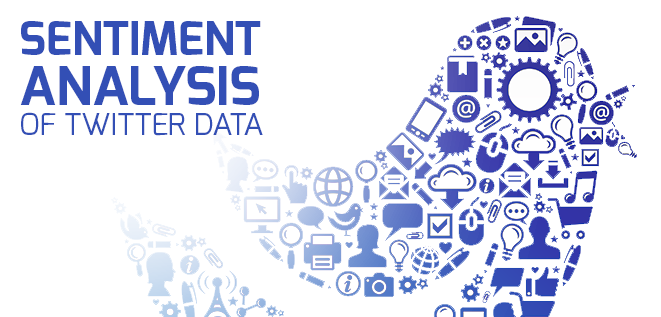

### CRISP-DM

## Overview

##### ▪ Business Understanding
##### ▪ Data Understanding
##### ▪ Data Preparation
##### ▪ Modeling
##### ▪ Evaluation
##### ▪ Deployment

## . Classify tweets-business objective
The business objective of the project is to gather tweets using both search and
streaming Twitter API. Save the tweets from the streaming API into a file, read
the file, analyze and classify them as positive or negative.

## Gathering data

#### Read twitter API ( search and stream)
##### ▪ Create a twitter account
##### ▪ Create an app
##### ▪ Get the keys
#### Read twitter API ( search and stream)
##### ▪ Read twitter API (using Tweepy or Twython)
##### ▪ !pip install twython

## Data Understanding
##### ▪ Get the tweets

##### ▪ Tweets are in a dict format

##### ▪ Use the statuses key of dict to create DataFrame
##### ▪ User key has many at attributes within
##### ▪ Create a separate DataFrame of user key
##### ▪ Combine the two DataFrames

## Analyze tweets

##### ▪ Analyze regions that are tweeting the most
##### ▪ Count vectorize the tweets

##### ▪ What type of words are being used

## Classify tweets

##### ▪ Get tweets ready for the Algorithms
##### ▪ Classify
##### ▪ Rate the tweets as positive and negative

# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

import re
import nltk

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
from PIL import Image
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import warnings

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

In [2]:
from twython import Twython
CONSUMER_KEY='XXXXXXXXXXXXXXXXXXXXX'#It is taking ckey and csecret when you create a developer account
CONSUMER_SECRET='XXXXXXXXXXXXXXXXXXXXXXXXXXX'
twitter =Twython(CONSUMER_KEY,CONSUMER_SECRET)

# Scrape tweets about Turkey & EDA

In [3]:
results = twitter.search( q='turkey', count=100)# I scraped 100 tweets about turkey
type(results)#q=query"

dict

In [4]:
results

{'statuses': [{'created_at': 'Wed Aug 10 10:00:17 +0000 2022',
   'id': 1557305830378283010,
   'id_str': '1557305830378283010',
   'text': '@haunaho_ @KyivIndependent And the EU feels otherwise. I am sure if Turkey felt suitable upset they could take this… https://t.co/uhCrwXqw3E',
   'truncated': True,
   'entities': {'hashtags': [],
    'symbols': [],
    'user_mentions': [{'screen_name': 'haunaho_',
      'name': 'Hau Naho',
      'id': 2469764724,
      'id_str': '2469764724',
      'indices': [0, 9]},
     {'screen_name': 'KyivIndependent',
      'name': 'The Kyiv Independent',
      'id': 1462548977367359490,
      'id_str': '1462548977367359490',
      'indices': [10, 26]}],
    'urls': [{'url': 'https://t.co/uhCrwXqw3E',
      'expanded_url': 'https://twitter.com/i/web/status/1557305830378283010',
      'display_url': 'twitter.com/i/web/status/1…',
      'indices': [117, 140]}]},
   'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
   'source': '<a href="http:/

In [5]:
all_items=results['statuses']

In [6]:
tweet_df=pd.DataFrame(all_items)
tweet_df.head()

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,retweeted_status,possibly_sensitive,extended_entities
0,Wed Aug 10 10:00:17 +0000 2022,1557305830378283010,1557305830378283010,@haunaho_ @KyivIndependent And the EU feels ot...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.556350e+18,1556349783127851008,...,None,False,0,0,False,False,en,NaN,NaN,NaN
1,Wed Aug 10 10:00:12 +0000 2022,1557305805753520133,1557305805753520133,@KripTokenTurkey @XT_Turkey Kendinizi ve proje...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'result_type': 'recent', 'iso_language_code':...","<a href=""http://twitter.com/download/android"" ...",1.557292e+18,1557292221623418881,...,None,False,0,0,False,False,tr,NaN,NaN,NaN
2,Wed Aug 10 10:00:11 +0000 2022,1557305804671180800,1557305804671180800,RT @1024updates: [📋] WOOYOUNG will be appearin...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,None,False,429,0,False,False,en,{'created_at': 'Wed Aug 10 09:13:46 +0000 2022...,NaN,NaN
3,Wed Aug 10 10:00:11 +0000 2022,1557305802540687360,1557305802540687360,"RT @MAliuludag_: 9 refugees from Turkey, inclu...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'result_type': 'recent', 'iso_language_code':...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,None,False,415,0,False,False,tr,{'created_at': 'Wed Aug 10 08:24:31 +0000 2022...,NaN,NaN
4,Wed Aug 10 10:00:11 +0000 2022,1557305801605365766,1557305801605365766,"RT @MAliuludag_: 9 refugees from Turkey, inclu...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'result_type': 'recent', 'iso_language_code':...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,None,False,415,0,False,False,tr,{'created_at': 'Wed Aug 10 08:24:31 +0000 2022...,NaN,NaN


In [7]:
tweet_user=pd.DataFrame([d['user'] for d in results['statuses']])
tweet_user.head()# We looked at information about users, when someone tweets, 43 information is saved

,id,id_str,name,screen_name,location,description,url,entities,protected,followers_count,...,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,withheld_in_countries,profile_banner_url
0,4880952429,4880952429,Johnny Srikrishna,johnn06696,"London, England",Has escaped life at a big corporate. Passionat...,None,{'description': {'urls': []}},False,32,...,True,False,True,False,None,None,None,none,[],NaN
1,1369923064868319232,1369923064868319232,Wanda Maximof,wandamaximof804,"İstanbul, Türkiye",İstanbul\n\nhttps://t.co/4dxaou1wWa Airdrop et...,https://t.co/Zrtsc49mGR,{'url': {'urls': [{'url': 'https://t.co/Zrtsc4...,False,111,...,True,True,True,False,None,None,None,none,[],https://pbs.twimg.com/profile_banners/13699230...
2,1329841810437500928,1329841810437500928,KINGTEEZ,kingteez_turkey,Wonderland,G DRAGON/ ATEEZ,None,{'description': {'urls': []}},False,1909,...,True,True,True,False,None,None,None,none,[],https://pbs.twimg.com/profile_banners/13298418...
3,1539605696832016385,1539605696832016385,Faranco,Farancolu,,Faranco,None,{'description': {'urls': []}},False,40,...,True,True,True,False,None,None,None,none,[],NaN
4,971497864017924096,971497864017924096,Çerkes,SenCerkes,,1.Çerkes Dünyası\n2.Gündem ve Spor Haberleri\n...,None,{'description': {'urls': []}},False,1336,...,True,False,True,False,None,None,None,none,[],NaN


In [8]:
twitter_df=tweet_df.merge(tweet_user, left_index=True,right_index=True)

# Finding Locations of mostTweets

In [10]:
twitter_df.head()

,created_at_x,id_x,id_str_x,text,truncated,entities_x,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,withheld_in_countries,profile_banner_url
0,Wed Aug 10 10:00:17 +0000 2022,1557305830378283010,1557305830378283010,@haunaho_ @KyivIndependent And the EU feels ot...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.556350e+18,1556349783127851008,...,True,False,True,False,None,None,None,none,[],NaN
1,Wed Aug 10 10:00:12 +0000 2022,1557305805753520133,1557305805753520133,@KripTokenTurkey @XT_Turkey Kendinizi ve proje...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'result_type': 'recent', 'iso_language_code':...","<a href=""http://twitter.com/download/android"" ...",1.557292e+18,1557292221623418881,...,True,True,True,False,None,None,None,none,[],https://pbs.twimg.com/profile_banners/13699230...
2,Wed Aug 10 10:00:11 +0000 2022,1557305804671180800,1557305804671180800,RT @1024updates: [📋] WOOYOUNG will be appearin...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,True,True,True,False,None,None,None,none,[],https://pbs.twimg.com/profile_banners/13298418...
3,Wed Aug 10 10:00:11 +0000 2022,1557305802540687360,1557305802540687360,"RT @MAliuludag_: 9 refugees from Turkey, inclu...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'result_type': 'recent', 'iso_language_code':...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,True,True,True,False,None,None,None,none,[],NaN
4,Wed Aug 10 10:00:11 +0000 2022,1557305801605365766,1557305801605365766,"RT @MAliuludag_: 9 refugees from Turkey, inclu...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'result_type': 'recent', 'iso_language_code':...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,True,False,True,False,None,None,None,none,[],NaN


In [11]:
twitter_df.shape

(100, 70)

<AxesSubplot:>

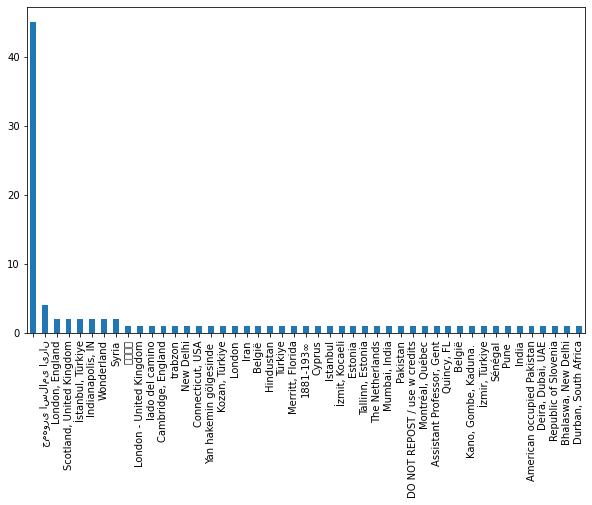

In [12]:
twitter_df.location.value_counts().plot(kind='bar',figsize=(10,6))#atanların hangi ülke konum attığı

# CLEANING THE DATA ---NLP Pre-Processing

In [13]:
text_df=pd.DataFrame(twitter_df['text'])
text_df

,text
0,@haunaho_ @KyivIndependent And the EU feels ot...
1,@KripTokenTurkey @XT_Turkey Kendinizi ve proje...
2,RT @1024updates: [📋] WOOYOUNG will be appearin...
3,"RT @MAliuludag_: 9 refugees from Turkey, inclu..."
4,"RT @MAliuludag_: 9 refugees from Turkey, inclu..."
...,...
95,RT @gmbfca: #BoycottLalSinghChadha Look at Ami...
96,RT @Ava33851898: 💚💛💙\nI vote for #CanYaman fr...
97,@ANCA_DC Turkey is Isis 🦃🦃🦃🦃🦃🦃
98,"Az önce bir fotoğraf paylaştı @ Serdivan, Saka..."


# STEPS TO DO IN NLP
##### 1-All cumleral lowercase letters will be CONVERTED
##### 2-remove punctuation marks
##### 3-remove numbers
##### 4-remove line ending \n \r
##### -remove stop words, unnecessary words
##### -Tokenization
##### -lemma and stemma -remove attachments and find roots<
##### -We are putting the texts into numbers with vectirizer

In [14]:
text_df['text']=text_df['text'].str.lower()
text_df['text']=text_df['text'].str.replace("[^a-zA-Z0-9\s]",'')
text_df['text']=text_df['text'].str.replace('\d+','')
text_df['text']=text_df['text'].str.replace('\n','').replace('\r','')

## Stopword removal

### What: Remove common words that will likely appear in any text
### Why: They don't tell you much about your text

In [15]:
stopwords=stopwords.words('english')

In [16]:
text_df['text']=text_df['text'].apply(lambda x : ' '.join(i for i in x.split() if i not in stopwords ))

In [17]:
text_df

,text
0,haunaho kyivindependent eu feels otherwise sur...
1,kriptokenturkey xtturkey kendinizi projenizi b...
2,rt updates wooyoung appearing musician documen...
3,rt maliuludag refugees turkey including montho...
4,rt maliuludag refugees turkey including montho...
...,...
95,rt gmbfca boycottlalsinghchadha look amir khan...
96,rt ava vote canyaman turkey handsome faces fac...
97,ancadc turkey isis
98,az nce bir fotoraf paylat serdivan sakarya tur...


# Language Detection

In [18]:
from langdetect import detect
text_df['language']=text_df['text'].apply(detect)
text_df=text_df[text_df['language']=='en']
text_df

,text,language
0,haunaho kyivindependent eu feels otherwise sur...,en
2,rt updates wooyoung appearing musician documen...,en
3,rt maliuludag refugees turkey including montho...,en
4,rt maliuludag refugees turkey including montho...,en
5,husobi dimoulaeftychia know sayyour arguments ...,en
...,...,...
93,rt stevehanke turkey nd place weeks inflation ...,en
95,rt gmbfca boycottlalsinghchadha look amir khan...,en
96,rt ava vote canyaman turkey handsome faces fac...,en
97,ancadc turkey isis,en


In [19]:
from textblob import TextBlob
text_df[['polarity','subjectivity']]=text_df['text'].apply(lambda t:pd.Series(TextBlob(t).sentiment))

C:\Users\Ahmet\AppData\Local\Temp\ipykernel_22148\2528567254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[['polarity','subjectivity']]=text_df['text'].apply(lambda t:pd.Series(TextBlob(t).sentiment))
C:\Users\Ahmet\AppData\Local\Temp\ipykernel_22148\2528567254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[['polarity','subjectivity']]=text_df['text'].apply(lambda t:pd.Series(TextBlob(t).sentiment))


In [20]:
text_df

,text,language,polarity,subjectivity
0,haunaho kyivindependent eu feels otherwise sur...,en,0.525,0.819444
2,rt updates wooyoung appearing musician documen...,en,0.000,0.000000
3,rt maliuludag refugees turkey including montho...,en,0.000,0.000000
4,rt maliuludag refugees turkey including montho...,en,0.000,0.000000
5,husobi dimoulaeftychia know sayyour arguments ...,en,0.250,0.350000
...,...,...,...,...
93,rt stevehanke turkey nd place weeks inflation ...,en,0.500,1.000000
95,rt gmbfca boycottlalsinghchadha look amir khan...,en,0.000,0.000000
96,rt ava vote canyaman turkey handsome faces fac...,en,0.500,1.000000
97,ancadc turkey isis,en,0.000,0.000000


In [21]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
text_df['tokenized']=[tokenizer.tokenize(i) for i in text_df['text'].values]

C:\Users\Ahmet\AppData\Local\Temp\ipykernel_22148\3491798201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['tokenized']=[tokenizer.tokenize(i) for i in text_df['text'].values]


In [22]:
text_df

,text,language,polarity,subjectivity,tokenized
0,haunaho kyivindependent eu feels otherwise sur...,en,0.525,0.819444,"[haunaho, kyivindependent, eu, feels, otherwis..."
2,rt updates wooyoung appearing musician documen...,en,0.000,0.000000,"[rt, updates, wooyoung, appearing, musician, d..."
3,rt maliuludag refugees turkey including montho...,en,0.000,0.000000,"[rt, maliuludag, refugees, turkey, including, ..."
4,rt maliuludag refugees turkey including montho...,en,0.000,0.000000,"[rt, maliuludag, refugees, turkey, including, ..."
5,husobi dimoulaeftychia know sayyour arguments ...,en,0.250,0.350000,"[husobi, dimoulaeftychia, know, sayyour, argum..."
...,...,...,...,...,...
93,rt stevehanke turkey nd place weeks inflation ...,en,0.500,1.000000,"[rt, stevehanke, turkey, nd, place, weeks, inf..."
95,rt gmbfca boycottlalsinghchadha look amir khan...,en,0.000,0.000000,"[rt, gmbfca, boycottlalsinghchadha, look, amir..."
96,rt ava vote canyaman turkey handsome faces fac...,en,0.500,1.000000,"[rt, ava, vote, canyaman, turkey, handsome, fa..."
97,ancadc turkey isis,en,0.000,0.000000,"[ancadc, turkey, isis]"


In [23]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
text_df['lemmatize']=[[lemmatizer.lemmatize(str(i)) for i in words] for words in text_df['text'].values]

C:\Users\Ahmet\AppData\Local\Temp\ipykernel_22148\4029620484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['lemmatize']=[[lemmatizer.lemmatize(str(i)) for i in words] for words in text_df['text'].values]


In [24]:
text_df

,text,language,polarity,subjectivity,tokenized,lemmatize
0,haunaho kyivindependent eu feels otherwise sur...,en,0.525,0.819444,"[haunaho, kyivindependent, eu, feels, otherwis...","[h, a, u, n, a, h, o, , k, y, i, v, i, n, d, ..."
2,rt updates wooyoung appearing musician documen...,en,0.000,0.000000,"[rt, updates, wooyoung, appearing, musician, d...","[r, t, , u, p, d, a, t, e, s, , w, o, o, y, ..."
3,rt maliuludag refugees turkey including montho...,en,0.000,0.000000,"[rt, maliuludag, refugees, turkey, including, ...","[r, t, , m, a, l, i, u, l, u, d, a, g, , r, ..."
4,rt maliuludag refugees turkey including montho...,en,0.000,0.000000,"[rt, maliuludag, refugees, turkey, including, ...","[r, t, , m, a, l, i, u, l, u, d, a, g, , r, ..."
5,husobi dimoulaeftychia know sayyour arguments ...,en,0.250,0.350000,"[husobi, dimoulaeftychia, know, sayyour, argum...","[h, u, s, o, b, i, , d, i, m, o, u, l, a, e, ..."
...,...,...,...,...,...,...
93,rt stevehanke turkey nd place weeks inflation ...,en,0.500,1.000000,"[rt, stevehanke, turkey, nd, place, weeks, inf...","[r, t, , s, t, e, v, e, h, a, n, k, e, , t, ..."
95,rt gmbfca boycottlalsinghchadha look amir khan...,en,0.000,0.000000,"[rt, gmbfca, boycottlalsinghchadha, look, amir...","[r, t, , g, m, b, f, c, a, , b, o, y, c, o, ..."
96,rt ava vote canyaman turkey handsome faces fac...,en,0.500,1.000000,"[rt, ava, vote, canyaman, turkey, handsome, fa...","[r, t, , a, v, a, , v, o, t, e, , c, a, n, ..."
97,ancadc turkey isis,en,0.000,0.000000,"[ancadc, turkey, isis]","[a, n, c, a, d, c, , t, u, r, k, e, y, , i, ..."


In [25]:
text_df.loc[text_df['subjectivity']>0.5,'sentiment']=2 #pozitive
text_df.loc[text_df['subjectivity']==0.5,'sentiment']=1 #neutral
text_df.loc[text_df['subjectivity']<0.5,'sentiment']=0 #negative
text_df

C:\Users\Ahmet\AppData\Local\Temp\ipykernel_22148\4001098305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df.loc[text_df['subjectivity']>0.5,'sentiment']=2 #pozitive


,text,language,polarity,subjectivity,tokenized,lemmatize,sentiment
0,haunaho kyivindependent eu feels otherwise sur...,en,0.525,0.819444,"[haunaho, kyivindependent, eu, feels, otherwis...","[h, a, u, n, a, h, o, , k, y, i, v, i, n, d, ...",2.0
2,rt updates wooyoung appearing musician documen...,en,0.000,0.000000,"[rt, updates, wooyoung, appearing, musician, d...","[r, t, , u, p, d, a, t, e, s, , w, o, o, y, ...",0.0
3,rt maliuludag refugees turkey including montho...,en,0.000,0.000000,"[rt, maliuludag, refugees, turkey, including, ...","[r, t, , m, a, l, i, u, l, u, d, a, g, , r, ...",0.0
4,rt maliuludag refugees turkey including montho...,en,0.000,0.000000,"[rt, maliuludag, refugees, turkey, including, ...","[r, t, , m, a, l, i, u, l, u, d, a, g, , r, ...",0.0
5,husobi dimoulaeftychia know sayyour arguments ...,en,0.250,0.350000,"[husobi, dimoulaeftychia, know, sayyour, argum...","[h, u, s, o, b, i, , d, i, m, o, u, l, a, e, ...",0.0
...,...,...,...,...,...,...,...
93,rt stevehanke turkey nd place weeks inflation ...,en,0.500,1.000000,"[rt, stevehanke, turkey, nd, place, weeks, inf...","[r, t, , s, t, e, v, e, h, a, n, k, e, , t, ...",2.0
95,rt gmbfca boycottlalsinghchadha look amir khan...,en,0.000,0.000000,"[rt, gmbfca, boycottlalsinghchadha, look, amir...","[r, t, , g, m, b, f, c, a, , b, o, y, c, o, ...",0.0
96,rt ava vote canyaman turkey handsome faces fac...,en,0.500,1.000000,"[rt, ava, vote, canyaman, turkey, handsome, fa...","[r, t, , a, v, a, , v, o, t, e, , c, a, n, ...",2.0
97,ancadc turkey isis,en,0.000,0.000000,"[ancadc, turkey, isis]","[a, n, c, a, d, c, , t, u, r, k, e, y, , i, ...",0.0


In [53]:
text_df.sentiment.value_counts()

0.0    62
2.0    17
1.0     2
Name: sentiment, dtype: int64

# WORD CLOUD

In [26]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [27]:
def create_wordcloud(text):
    mask = np.array(Image.open('tw.jpg'))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask=mask, max_words=25000,
                  stopwords= stopwords)
    wc.generate(str(text))
    wc.to_file('wc.png')
    print('Word Cloud saved successfully')
    display(Image.open('wc.png'))

Word Cloud saved successfully


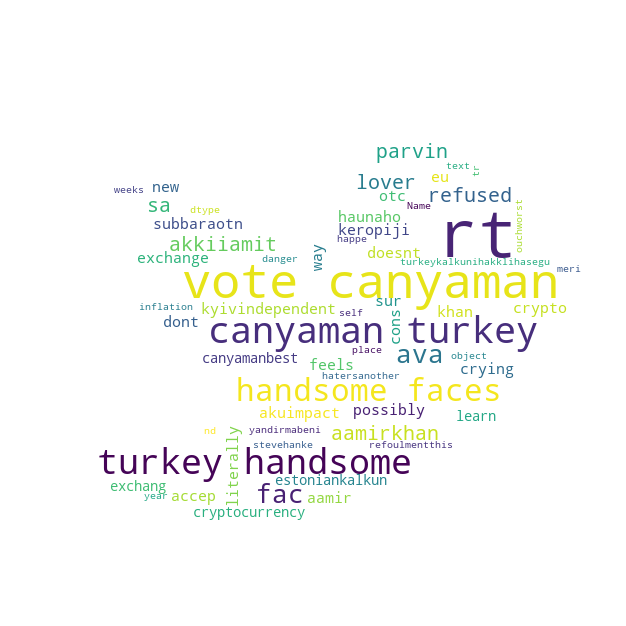

In [28]:
create_wordcloud(text_df[text_df['sentiment']==2].text)

Word Cloud saved successfully


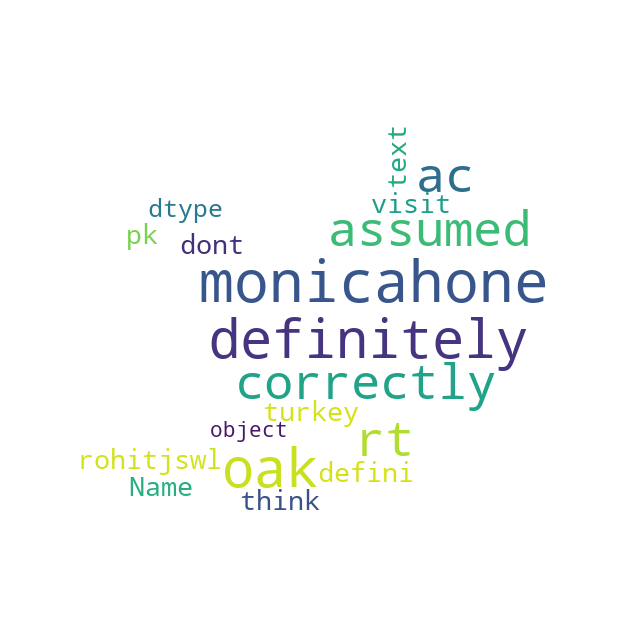

In [29]:
create_wordcloud(text_df[text_df['sentiment']==1].text)

Word Cloud saved successfully


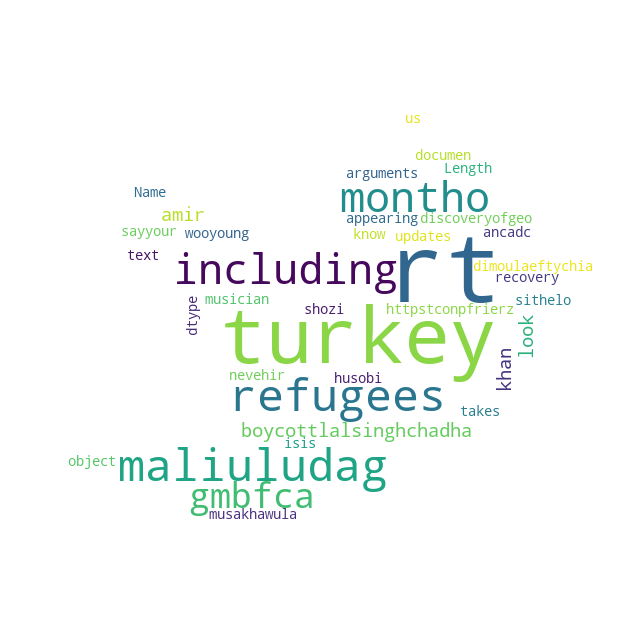

In [30]:
create_wordcloud(text_df[text_df['sentiment']==0].text)

# CLASSIFICATION

In [31]:
clss_df=text_df[['sentiment','text']]

In [33]:
!pip install numba --upgrade

     ---------------------------------------- 2.5/2.5 MB 1.1 MB/s eta 0:00:00
     -------------------------------------- 23.2/23.2 MB 264.0 kB/s eta 0:00:00
     -------------------------------------- 14.8/14.8 MB 593.9 kB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.1
    Uninstalling numpy-1.23.1:
      Successfully uninstalled numpy-1.23.1

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


ERROR: Could not install packages due to an OSError: [WinError 5] Erişim engellendi: 'C:\\Users\\Ahmet\\anaconda3\\Lib\\site-packages\\numpy\\~libs\\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [47]:
from pycaret.classification import setup,compare_models

In [48]:
exp_name = setup(data = clss_df, target = 'sentiment') 
best=compare_models()

In [34]:
from pycaret.classification import *
exp_name=setup(data=clss_df,target='sentiment')

,Description,Value
0,session_id,6316
1,Target,sentiment
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(81, 2)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [35]:
best_model=compare_models()

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [37]:
text_df.sentiment =text_df.sentiment.astype('category')


In [38]:
x,y=text_df['text'],text_df['sentiment']


In [39]:
x.shape,y.shape


((81,), (81,))

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=60)


In [41]:
y_test


18    0.0
60    0.0
79    0.0
17    0.0
64    0.0
4     0.0
90    0.0
31    0.0
40    0.0
92    2.0
96    2.0
0     2.0
58    0.0
84    0.0
69    1.0
5     0.0
9     0.0
19    2.0
67    0.0
2     0.0
25    0.0
Name: sentiment, dtype: category
Categories (3, float64): [0.0, 1.0, 2.0]

In [42]:
vect=CountVectorizer()
x_train_dtm=vect.fit_transform(x_train,y_train)
x_test_dtm=vect.transform(x_test)

In [43]:
x_train_dtm.shape,x_test_dtm.shape


((60, 313), (21, 313))

In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [45]:
b=MultinomialNB()
model=b.fit(x_train_dtm,y_train)
b_predict=b.predict(x_test_dtm)

In [46]:
accuracy_score(y_test,b_predict)

0.9047619047619048